<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-просмотр-данных" data-toc-modified-id="Загрузка-и-просмотр-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и просмотр данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Работа-с-пропусками-и-дубликатами:" data-toc-modified-id="Работа-с-пропусками-и-дубликатами:-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Работа с пропусками и дубликатами:</a></span></li><li><span><a href="#Обработка-выбросов-и-скрытых-пропусков:" data-toc-modified-id="Обработка-выбросов-и-скрытых-пропусков:-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Обработка выбросов и скрытых пропусков:</a></span></li></ul></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Построение-моделей-на-основе-машинного-обучения" data-toc-modified-id="Построение-моделей-на-основе-машинного-обучения-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построение моделей на основе машинного обучения</a></span><ul class="toc-item"><li><span><a href="#Кодирование-и-масштабирование-признаков" data-toc-modified-id="Кодирование-и-масштабирование-признаков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Кодирование и масштабирование признаков</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#CatBoostRegressor-с-закодированными-категориальными-призаками" data-toc-modified-id="CatBoostRegressor-с-закодированными-категориальными-призаками-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>CatBoostRegressor с закодированными категориальными призаками</a></span></li><li><span><a href="#CatBoostRegressor-без-кодировки-категориальных-признаков" data-toc-modified-id="CatBoostRegressor-без-кодировки-категориальных-признаков-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>CatBoostRegressor без кодировки категориальных признаков</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Определение стоимости автомобилей

В вашем распоряжении исторические данные сервиса по продаже автомобилей: технические характеристики, комплектации и цены автомобилей. 

Задачи: 

 - построить модель на основе машинного обучения для определения стоимости автомобиля;
 - оценить качество и скорость моделей, выбрать лучшую.



В этой задаче важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Загрузка и просмотр данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

pd.options.mode.chained_assignment = None

from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import time

In [2]:

data = pd.read_csv('/datasets/autos.csv')
data.info()
print()
display(data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


Посмотрел данные в таблице

## Предобработка данных

In [3]:
print(data['Price'].value_counts())

0        10772
500       5670
1500      5394
1000      4649
1200      4594
         ...  
13180        1
10879        1
2683         1
634          1
8188         1
Name: Price, Length: 3731, dtype: int64


Посмотрел на уникальные значения целевого признака и из количество

In [4]:
data = data.loc[data.loc[:, 'Price'] > 10]

Отсеял неправдободобные значения цены

In [5]:
data = data.drop('DateCrawled', axis=1)
data = data.drop('DateCreated', axis=1)
data = data.drop('PostalCode', axis=1)


Удалил признаки не влияющие на целевой признак

#### Работа с пропусками и дубликатами:

In [6]:
print(data.duplicated().sum())
data = data.drop_duplicates().reset_index(drop=True)

105


In [7]:
print(data.isna().sum())

Price                    0
VehicleType          33202
RegistrationYear         0
Gearbox              16901
Power                    0
Model                17230
Kilometer                0
RegistrationMonth        0
FuelType             28940
Brand                    0
NotRepaired          65121
NumberOfPictures         0
LastSeen                 0
dtype: int64


Посмотрел количество дубликатов и пустых значений

**VehicleType**

In [8]:
print(data['VehicleType'].value_counts())
print()
print(data['VehicleType'].unique())

sedan          89159
small          77809
wagon          63501
bus            28275
convertible    19818
coupe          15564
suv            11764
other           3060
Name: VehicleType, dtype: int64

[nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']


In [9]:
data['VehicleType'] = data['VehicleType'].fillna('indefined')

**Gearbox**

In [10]:
print(data['Gearbox'].value_counts())
print()
print(data['Gearbox'].unique())

manual    260564
auto       64687
Name: Gearbox, dtype: int64

['manual' 'auto' nan]


In [11]:
data['Gearbox'] = data['Gearbox'].fillna('indefined')

**Model**

In [12]:
print(data['Model'].value_counts())


golf                  28144
other                 23582
3er                   19094
polo                  12580
corsa                 12141
                      ...  
serie_2                   8
rangerover                4
serie_3                   3
range_rover_evoque        2
serie_1                   1
Name: Model, Length: 250, dtype: int64


In [13]:
data['Model'] = data['Model'].fillna('other')


**FuelType**

In [14]:
print(data['FuelType'].value_counts())
print()
print(data['FuelType'].unique())

petrol      210090
gasoline     96944
lpg           5152
cng            551
hybrid         226
other          162
electric        87
Name: FuelType, dtype: int64

['petrol' 'gasoline' nan 'lpg' 'other' 'hybrid' 'cng' 'electric']


In [15]:
data['FuelType'] = data['FuelType'].fillna('indefined')

**NotRepaired**

In [16]:
print(data['NotRepaired'].value_counts())
print()
print(data['NotRepaired'].unique())

no     243253
yes     33778
Name: NotRepaired, dtype: int64

[nan 'yes' 'no']


In [17]:
data['NotRepaired'] = data['NotRepaired'].fillna('indefined')

In [18]:
print(data.isna().sum())

Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
NumberOfPictures     0
LastSeen             0
dtype: int64


Пропуски заменил на значение новой категории.

#### Обработка выбросов и скрытых пропусков:

In [19]:
print(data['Brand'].unique())

['volkswagen' 'audi' 'jeep' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda'
 'nissan' 'renault' 'mercedes_benz' 'opel' 'seat' 'citroen' 'honda' 'fiat'
 'mini' 'smart' 'hyundai' 'alfa_romeo' 'subaru' 'volvo' 'mitsubishi' 'kia'
 'suzuki' 'lancia' 'sonstige_autos' 'toyota' 'chevrolet' 'dacia'
 'daihatsu' 'trabant' 'chrysler' 'jaguar' 'daewoo' 'rover' 'porsche'
 'saab' 'land_rover' 'lada']


In [20]:
print(data['Power'].value_counts())
print()
print(data['Power'].unique())

0        35774
75       23242
60       15425
150      14110
101      12930
         ...  
923          1
10910        1
9013         1
4400         1
6006         1
Name: Power, Length: 698, dtype: int64

[    0   190   163    75    69   102   109   125   101   105   140   115
   131    60   136   160   231    90    50   118   193    99   113   218
   122   129    70   306    95    61   177    80   170    55   143    64
   232   150   156    82   155    54   185    87   180    86    84   224
   235   200   178   265    77   110   144   120   286   116   184   126
   204    88   194   305   197   179   250    45   313    41   165    98
   130   114   211    56   201   213    58   107    83   174   100   220
    85    73   192    68    66   299    74    52   147    65   310    71
    97   239   203     5   300   103   258   320    63    81   148    44
   145   280   260   104   188   333   186   117   141    59   132   234
   158    39    92    51   135   230    53   209    43   146    6

In [21]:
data = data.loc[data.loc[:, 'Power'] > 10]
data = data.loc[data.loc[:, 'Power'] < 600]

In [22]:
print(data.columns)
data.info()

Index(['Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 'Model',
       'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand', 'NotRepaired',
       'NumberOfPictures', 'LastSeen'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 305797 entries, 1 to 342151
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              305797 non-null  int64 
 1   VehicleType        305797 non-null  object
 2   RegistrationYear   305797 non-null  int64 
 3   Gearbox            305797 non-null  object
 4   Power              305797 non-null  int64 
 5   Model              305797 non-null  object
 6   Kilometer          305797 non-null  int64 
 7   RegistrationMonth  305797 non-null  int64 
 8   FuelType           305797 non-null  object
 9   Brand              305797 non-null  object
 10  NotRepaired        305797 non-null  object
 11  NumberOfPictures   305797 non-null  int64

In [23]:
print(data['LastSeen'].max())

2016-04-07 14:58:51


In [24]:
data = data.drop('LastSeen', axis=1)

In [25]:
print(data['RegistrationYear'].value_counts())
print()
print(data['RegistrationYear'].unique())


1999    19495
2005    18864
2000    18707
2006    18545
2003    17901
        ...  
1947        1
1948        1
1234        1
1949        1
2800        1
Name: RegistrationYear, Length: 106, dtype: int64

[2011 2004 2001 2008 1995 2014 1998 2005 2016 2007 2009 2002 2018 1997
 1990 2017 1981 2003 1991 1984 2006 1999 2012 2010 2000 1992 2013 1994
 1996 1989 2015 1993 1985 1982 1983 1973 1969 1971 1987 1988 1980 1970
 1986 1976 1965 1945 1974 1955 1978 1979 1972 1977 1961 1975 1968 1963
 1966 1958 1956 1941 1960 1500 1962 1929 1957 1910 1940 1964 1967 1949
 1937 1959 1953 2019 1954 1234 2900 6000 5911 4000 1932 1951 1952 1950
 5000 1942 1935 1923 1930 9999 1943 1938 1936 1800 1928 1000 3000 2800
 1931 1948 4500 1927 1933 8200 1947 1944]


In [26]:
data = data.loc[data.loc[:, 'RegistrationYear'] > 1920]
data = data.loc[data.loc[:, 'RegistrationYear'] < 2017]

In [27]:
print(data['RegistrationYear'].unique().min())
print()
print(data['RegistrationYear'].unique().max())

1923

2016


In [28]:
print(data.duplicated().sum())
print(data.isna().sum())
data = data.drop_duplicates().reset_index(drop=True)

23047
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
NumberOfPictures     0
dtype: int64


Посмотрел на значения признаков с пропусками

Заменил пропуски на категориальные признаки

Отсеял неправдободобный год автомобилей и неправдободобную мощность

Посмотрел на дубликаты опять и удалил их



In [29]:
data['RegistrationYear'].unique()

array([2011, 2004, 2001, 2008, 1995, 2014, 1998, 2005, 2016, 2007, 2009,
       2002, 1997, 1990, 1981, 2003, 1991, 1984, 2006, 1999, 2012, 2010,
       2000, 1992, 2013, 1994, 1996, 1989, 2015, 1993, 1985, 1982, 1983,
       1973, 1969, 1971, 1987, 1988, 1980, 1970, 1986, 1976, 1965, 1945,
       1974, 1955, 1978, 1979, 1972, 1977, 1961, 1975, 1968, 1963, 1966,
       1958, 1956, 1941, 1960, 1962, 1929, 1957, 1940, 1964, 1967, 1949,
       1937, 1959, 1953, 1954, 1932, 1951, 1952, 1950, 1942, 1935, 1923,
       1930, 1943, 1938, 1936, 1928, 1931, 1948, 1927, 1933, 1947, 1944])

In [30]:
print(data['RegistrationYear'].value_counts())

1999    17883
2005    17459
2000    17240
2006    16954
2003    16452
        ...  
1944        1
1947        1
1948        1
1949        1
1923        1
Name: RegistrationYear, Length: 88, dtype: int64


## Исследовательский анализ данных

Text(0.5, 1.0, 'Распределение автомобилей по годам выпуска')

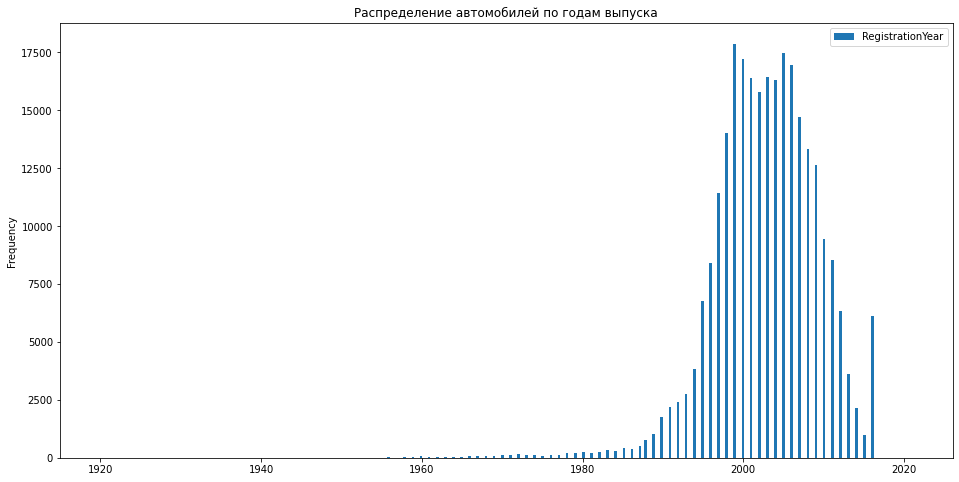

In [31]:
data.plot(y='RegistrationYear', kind='hist', bins=300, range=(1920, 2021), figsize=(16, 8))
plt.title('Распределение автомобилей по годам выпуска')

Text(0.5, 1.0, 'Распределение автомобилей по годам выпуска')

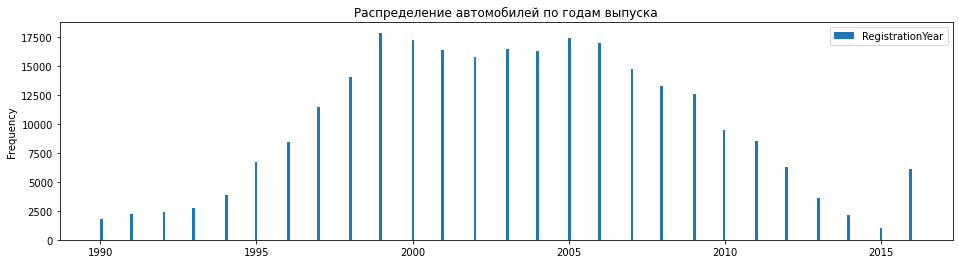

In [32]:
data.plot(y='RegistrationYear', kind='hist', bins=300, range=(1990, 2016), figsize=(16, 4))
plt.title('Распределение автомобилей по годам выпуска')

In [33]:
data['RegistrationYear_Category'] = 0

for i in range(len(data)):
    if data['RegistrationYear'][i] < 1960:
        data['RegistrationYear_Category'][i] = 1
    else:
        if data['RegistrationYear'][i] < 1990:
            data['RegistrationYear_Category'][i] = 2
        else:
            if data['RegistrationYear'][i] < 2003:
                data['RegistrationYear_Category'][i] = 3
            else:
                if data['RegistrationYear'][i] < 2013:
                    data['RegistrationYear_Category'][i] = 4
                else:
                    data['RegistrationYear_Category'][i] = 5
                                
                        
                
    

In [34]:
data = data.drop('RegistrationYear', axis=1)
data = data.drop('RegistrationMonth', axis=1)

Разделил годы выпуска авто на категории, исходя из данных на графике распределения

Удалил ненужные признаки 

In [35]:
display(data)

,Price,VehicleType,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired,NumberOfPictures,RegistrationYear_Category
0,18300,coupe,manual,190,other,125000,gasoline,audi,yes,0,4
1,9800,suv,auto,163,grand,125000,gasoline,jeep,indefined,0,4
2,1500,small,manual,75,golf,150000,petrol,volkswagen,no,0,3
3,3600,small,manual,69,fabia,90000,gasoline,skoda,no,0,4
4,650,sedan,manual,102,3er,150000,petrol,bmw,yes,0,3
...,...,...,...,...,...,...,...,...,...,...,...
272484,5250,indefined,auto,150,159,150000,indefined,alfa_romeo,no,0,5
272485,3200,sedan,manual,225,leon,150000,petrol,seat,yes,0,4
272486,1199,convertible,auto,101,fortwo,125000,petrol,smart,no,0,3
272487,9200,bus,manual,102,transporter,150000,gasoline,volkswagen,no,0,3


## Построение моделей на основе машинного обучения

### Кодирование и масштабирование признаков

In [36]:
encoder = OrdinalEncoder()

data_B = data['Brand']
columns_data_B = ['Brand']
dataF_B = pd.DataFrame(data = data_B, columns = columns_data_B)
data_ordinal1 = pd.DataFrame(encoder.fit_transform(dataF_B),
                            columns=dataF_B.columns)
data['brand_en'] = data_ordinal1['Brand']
data = data.drop('Brand', axis=1)
data['brand_en'] = data['brand_en'].astype('int')

In [37]:
data_M = data['Model']
columns_data_M = ['Model']
dataF_M = pd.DataFrame(data = data_M, columns = columns_data_M)
data_ordinal = pd.DataFrame(encoder.fit_transform(dataF_M),
                            columns=dataF_M.columns)
data['model_en'] = data_ordinal['Model']
data = data.drop('Model', axis=1)
data['model_en'] = data['model_en'].astype('int')

In [38]:
df, dt = train_test_split(data, test_size=0.15, random_state=12345)

In [39]:
dt1 = dt

In [40]:
df1 = df

In [41]:
cat_features = ['VehicleType', 'Gearbox', 'FuelType', 'NotRepaired']

In [42]:
df = pd.get_dummies(df, drop_first=True)

In [43]:
dt = pd.get_dummies(df, drop_first=True)

Закодировал признаки прямым и порядковым кодированием, для того чтобы избежать большего количества однородных признаков.

Так же кодирования важно для построения простых моделей обучения, у которых нет внутренних алгоритмов кодирования.

In [44]:
numeric = ['RegistrationYear_Category', 'Power', 'Kilometer', 'NumberOfPictures', 'brand_en', 'model_en']


In [45]:
target_test = dt['Price']
features_test = dt.drop('Price', axis=1) 

In [46]:
features_train, features_valid, target_train, target_valid = train_test_split(
    df.drop('Price', axis=1), df['Price'], test_size=0.25, random_state=12345)

In [47]:
scaler = StandardScaler()
scaler.fit(features_train[numeric]) 
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

### Обучение моделей

In [48]:
print('Средняя цена на обучающей выборке:', target_valid.sum() / len(target_valid))


Средняя цена на обучающей выборке: 4847.2165998894725


In [49]:
time_fit = []
time_predict = []
RMSE = []
time_predict_t = []
RMSE_t = []

#### LinearRegression

In [50]:
model = LinearRegression()


**Обучение**

In [51]:
start_time = time.time()

model.fit(features_train, target_train)

print("--- %s seconds ---" % (time.time() - start_time))

time_fit.append((time.time() - start_time))

--- 0.379894495010376 seconds ---


**Предсказание на валидационной выборке**

In [52]:
start_time = time.time()

predictions_valid = model.predict(features_valid)

print("--- %s seconds ---" % (time.time() - start_time))

time_predict.append((time.time() - start_time))


--- 0.008482933044433594 seconds ---


In [53]:
rmse = mean_squared_error(target_valid, predictions_valid)**0.5

mean_price = predictions_valid.sum() / len(predictions_valid)

RMSE.append(rmse)


print('Средняя цена на предсказаниях:', mean_price)
print('RMSE модели:', rmse)


Средняя цена на предсказаниях: 4836.435303933031
RMSE модели: 2894.4078522390323


**Предсказания на тестовой выборке**

In [54]:
start_time = time.time()

predictions_valid = model.predict(features_test)

print("--- %s seconds ---" % (time.time() - start_time))

time_predict_t.append((time.time() - start_time))


--- 0.03603839874267578 seconds ---


In [55]:
rmse = mean_squared_error(target_test, predictions_valid)**0.5

mean_price = predictions_valid.sum() / len(predictions_valid)

RMSE_t.append(rmse)


print('Средняя цена на предсказаниях:', mean_price)
print('RMSE модели:', rmse)

Средняя цена на предсказаниях: 4839.283797849613
RMSE модели: 2862.5339826146624


#### RandomForestRegressor

**Подбор гиперпараметров** 

In [56]:
for est in range(1, 4):
    for depth in range (1, 4):
        model = RandomForestRegressor(random_state=12345, max_depth=depth, n_estimators=est)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)


        rmse = mean_squared_error(target_valid, predictions_valid)**0.5
        
                    
        print('RMSE модели:', rmse, est, depth)


RMSE модели: 3896.3995152198436 1 1
RMSE модели: 3474.1835639575033 1 2
RMSE модели: 3110.963826814246 1 3
RMSE модели: 3896.382689034804 2 1
RMSE модели: 3474.1175840785327 2 2
RMSE модели: 3110.891646101179 2 3
RMSE модели: 3896.3914213632615 3 1
RMSE модели: 3474.1454552551154 3 2
RMSE модели: 3110.958042741375 3 3


In [57]:
model = RandomForestRegressor(random_state=12345, max_depth=3, n_estimators=2)


**Обучение**

In [58]:
start_time = time.time()

model.fit(features_train, target_train)

print("--- %s seconds ---" % (time.time() - start_time))

time_fit.append((time.time() - start_time))


--- 0.2094438076019287 seconds ---


**Предсказание на валидационной выборке**

In [59]:
start_time = time.time()

predictions_valid = model.predict(features_valid)

print("--- %s seconds ---" % (time.time() - start_time))

time_predict.append((time.time() - start_time))


--- 0.009463310241699219 seconds ---


In [60]:
rmse = mean_squared_error(target_valid, predictions_valid)**0.5

RMSE.append(rmse)

print('RMSE модели:', rmse)


RMSE модели: 3110.891646101179


Text(0.5, 1.0, 'График важности факторов')

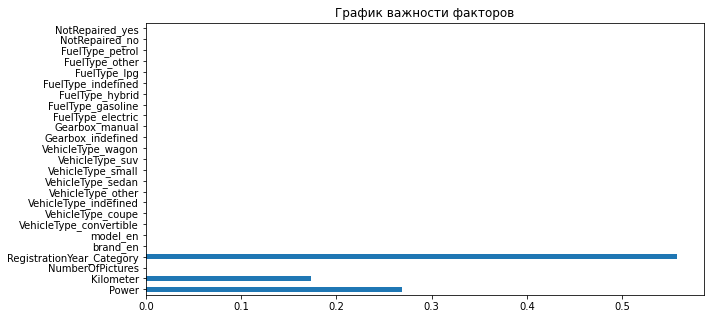

In [61]:
pd.Series(model.feature_importances_, index=features_valid.columns).plot(kind='barh', figsize=(10, 5))
plt.title('График важности факторов')

**Предсказания на тестовой выборке**

In [62]:
start_time = time.time()

predictions_valid = model.predict(features_test)

print("--- %s seconds ---" % (time.time() - start_time))

time_predict_t.append((time.time() - start_time))


--- 0.03796124458312988 seconds ---


In [63]:
rmse = mean_squared_error(target_test, predictions_valid)**0.5

RMSE_t.append(rmse)

print('RMSE модели:', rmse)


RMSE модели: 3099.388033096675


#### LGBMRegressor

In [64]:
model = LGBMRegressor()


**Обучение** 

In [65]:
start_time = time.time()

model.fit(features_train, target_train)

print("--- %s seconds ---" % (time.time() - start_time))

time_fit.append((time.time() - start_time))


--- 344.80340218544006 seconds ---


**Предсказание на валидационной выборке**

In [66]:
start_time = time.time()

predictions_valid = model.predict(features_valid)

print("--- %s seconds ---" % (time.time() - start_time))

time_predict.append((time.time() - start_time))


--- 0.39675211906433105 seconds ---


In [67]:
rmse = mean_squared_error(target_valid, predictions_valid)**0.5

RMSE.append(rmse)

print('RMSE модели:', rmse)


RMSE модели: 2054.1659682163368


Text(0.5, 1.0, 'График важности факторов')

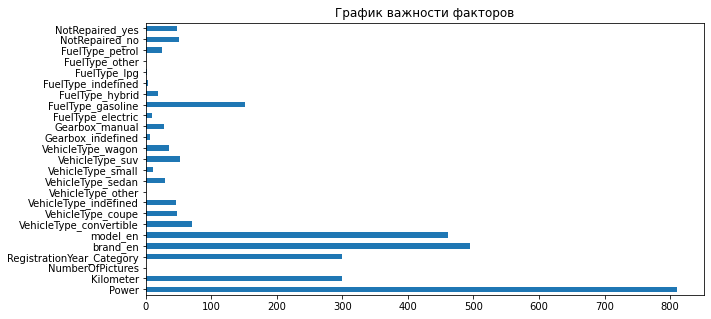

In [68]:
pd.Series(model.feature_importances_, index=features_valid.columns).plot(kind='barh', figsize=(10, 5))
plt.title('График важности факторов')

**Предсказания на тестовой выборке**

In [69]:
start_time = time.time()

predictions_valid = model.predict(features_test)

print("--- %s seconds ---" % (time.time() - start_time))

time_predict_t.append((time.time() - start_time))


--- 1.530336618423462 seconds ---


In [70]:
rmse = mean_squared_error(target_test, predictions_valid)**0.5

RMSE_t.append(rmse)

print('RMSE модели:', rmse)


RMSE модели: 2017.6414344828304


#### CatBoostRegressor с закодированными категориальными призаками 

**Поиск оптимальных гиперпараметров**

In [71]:
for depth in range (15, 17):
    model = CatBoostRegressor(iterations=100, learning_rate=0.01, depth=depth, verbose=False) 
    model.fit(features_train, target_train) 
    pred_valid = model.predict(features_valid) 
    rmse = mean_squared_error(target_valid, pred_valid)**0.5
            
    print('RMSE модели:', rmse, depth)

RMSE модели: 2788.7371806872725 15
RMSE модели: 2780.948330206659 16


In [72]:
learning_rate = [0.02, 0.03]
for i in learning_rate:
    model = CatBoostRegressor(iterations=100, learning_rate=i, depth=16, verbose=False) 
    model.fit(features_train, target_train) 
    pred_valid = model.predict(features_valid) 
    rmse = mean_squared_error(target_valid, pred_valid)**0.5
            
    print('RMSE модели:', rmse, i)

RMSE модели: 2292.1397299741648 0.02
RMSE модели: 2146.7620231829214 0.03


In [73]:
model = CatBoostRegressor(iterations=100, learning_rate=0.04, depth=16, verbose=False) 


**Обучение**

In [74]:
start_time = time.time()

model.fit(features_train, target_train) 

print("--- %s seconds ---" % (time.time() - start_time))

time_fit.append((time.time() - start_time))


--- 101.92275929450989 seconds ---


**Предсказание на валидационной выборке** 

In [75]:
start_time = time.time()

pred_valid = model.predict(features_valid) 

print("--- %s seconds ---" % (time.time() - start_time))

time_predict.append((time.time() - start_time))


--- 0.05013561248779297 seconds ---


In [76]:
rmse = mean_squared_error(target_valid, pred_valid)**0.5

RMSE.append(rmse)

print('RMSE модели:', rmse)


RMSE модели: 2082.1904160208146


Text(0.5, 1.0, 'График важности факторов')

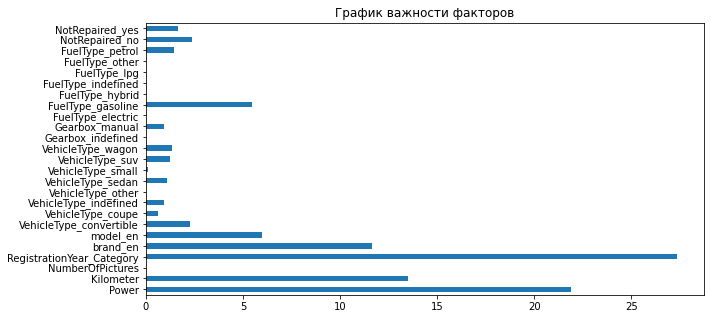

In [77]:
pd.Series(model.feature_importances_, index=features_valid.columns).plot(kind='barh', figsize=(10, 5))
plt.title('График важности факторов')

**Предсказания на тестовой выборке**

In [78]:
start_time = time.time()

pred_valid = model.predict(features_test) 

print("--- %s seconds ---" % (time.time() - start_time))

time_predict_t.append((time.time() - start_time))


--- 0.1851654052734375 seconds ---


In [79]:
rmse = mean_squared_error(target_test, pred_valid)**0.5

RMSE_t.append(rmse)

print('RMSE модели:', rmse)


RMSE модели: 2001.4014842112515


#### CatBoostRegressor без кодировки категориальных признаков 

In [80]:
del features_train
del features_valid
del target_train
del target_valid
del features_test
del target_test

In [81]:
target_test = dt1['Price']
features_test = dt1.drop('Price', axis=1) 

In [82]:
features_train, features_valid, target_train, target_valid = train_test_split(
    df1.drop('Price', axis=1), df1['Price'], test_size=0.25, random_state=12345)

In [83]:
model = CatBoostRegressor(iterations=100, learning_rate=0.04, depth=16, verbose=False) 

**Обучение**

In [84]:
start_time = time.time()

model.fit(features_train, target_train, cat_features=cat_features) 

print("--- %s seconds ---" % (time.time() - start_time))

time_fit.append((time.time() - start_time))


--- 141.46974182128906 seconds ---


**Предсказание на валидационной выборке** 

In [85]:
start_time = time.time()

pred_valid = model.predict(features_valid) 

print("--- %s seconds ---" % (time.time() - start_time))

time_predict.append((time.time() - start_time))

--- 0.0795447826385498 seconds ---


In [86]:
rmse = mean_squared_error(target_valid, pred_valid)**0.5

RMSE.append(rmse)

print('RMSE модели:', rmse)

RMSE модели: 2114.2589214626123


Text(0.5, 1.0, 'График важности факторов')

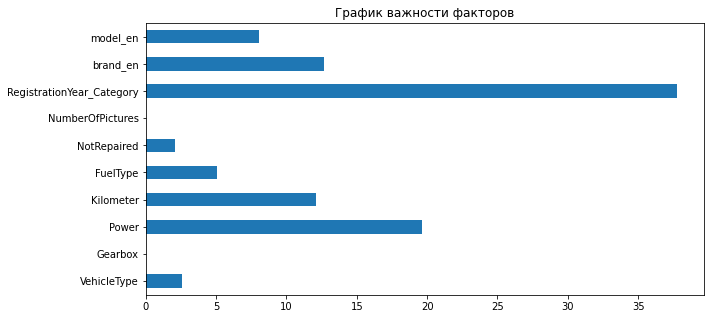

In [87]:
pd.Series(model.feature_importances_, index=features_valid.columns).plot(kind='barh', figsize=(10, 5))
plt.title('График важности факторов')

**Предсказания на тестовой выборке**

In [88]:
start_time = time.time()

pred_valid = model.predict(features_test) 

print("--- %s seconds ---" % (time.time() - start_time))

time_predict_t.append((time.time() - start_time))

--- 0.05714106559753418 seconds ---


In [89]:
rmse = mean_squared_error(target_test, pred_valid)**0.5

RMSE_t.append(rmse)

print('RMSE модели:', rmse)

RMSE модели: 2122.935888625295


## Анализ моделей

In [90]:
df_time = pd.DataFrame({'time_fit': time_fit, 'time_predict': time_predict, 'RMSE': RMSE})

df_time.index = ['LinearRegression', 'RandomForestRegressor', 'LGBMRegressor', 'CatBoostRegressor_coding', 'CatBoostRegressor_none_coding']

In [91]:
dt_time = pd.DataFrame({'time_fit': time_fit, 'time_predict': time_predict_t, 'RMSE': RMSE_t})

dt_time.index = ['LinearRegression', 'RandomForestRegressor', 'LGBMRegressor', 'CatBoostRegressor_coding', 'CatBoostRegressor_none_coding']

**На тренировочных данных:**

In [92]:
display(df_time)

,time_fit,time_predict,RMSE
LinearRegression,0.380128,0.008651,2894.407852
RandomForestRegressor,0.210059,0.009629,3110.891646
LGBMRegressor,344.803712,0.397256,2054.165968
CatBoostRegressor_coding,101.922935,0.050264,2082.190416
CatBoostRegressor_none_coding,141.469929,0.079683,2114.258921


**На тестовых данных:**

In [93]:
display(dt_time)

,time_fit,time_predict,RMSE
LinearRegression,0.380128,0.036731,2862.533983
RandomForestRegressor,0.210059,0.038125,3099.388033
LGBMRegressor,344.803712,1.530565,2017.641434
CatBoostRegressor_coding,101.922935,0.185329,2001.401484
CatBoostRegressor_none_coding,141.469929,0.057285,2122.935889


## Вывод

**Самое быстрое обучение у RandomForestRegressor.**

**Самое маленькое время на предсказания так же у RandomForestRegressor.**

**Лучшая метрика качества у CatBoostRegressor_coding.**

**Вот такие дела.**